CTRL+[ compacta as celulas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

#Dados

In [ ]:
diretorio = '/content/drive/MyDrive/AM1/T2/'
formato = '.pdf'

In [ ]:
%cd $diretorio

/content/drive/MyDrive/AM1/T2


##spotify
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks


Este dataset é bem padronizado, então para ler foi bem simples

In [ ]:
spotify = pd.read_csv(diretorio+'dados/spotify/data.csv',)

***release_date*** foi removido por ser pouco padronizada, as vezes contendo ano, mês e dia, e as vezes contendo apensa o ano. Como existe um atributo que marca o ano da música, ***release_date*** não se faz necessário.

***name*** não parece um bom atributo para agrupar músicas, pois, seria necessário processar algum tipo de significado do nome para agrupar músicas, e ainda sim, não seria muito bom, tendo em vista que músicas com mesmo nome não necessariamente são parecidas.

***id*** único e não diz nada sobre a música, completamente desnecessário.

***artirsts*** apesar de ser um bom indicativo para a semelhança das músicas, seria um pouco mais difícil tratar este atributo, pois, cada musica pode ter mais de um artista, um pouco mais custoso por se tratar de muitos artistas, o que tornaria o *one-hot-encoding* esparso.

In [ ]:
try:
    spotify.drop(columns=['release_date','name','id','artists'],inplace=True)
except:
    pass

In [ ]:
numericals = spotify.describe().columns
categoricals = [x for x in spotify.columns if x not in numericals]

In [ ]:
numericals

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

Aqui é possivel ter uma visão do dataset, de seus atributos e valores.

In [ ]:
spotify.head(3)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913,3,0.101,-14.850,1,5,0.0339,110.339


Esta tabela é muito util, mas possui informações que são melhores visualizadas nos gráficos de boxplot

In [ ]:
spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Aqui é possível identificar os tipos de atributos e como tratá-los, não levar somente isso para definir como tratá-los, pois, ainda podem existir atributos categóricos como ***key*** que podem ser tratados de forma diferente.

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

a função
`sns.pairplot(spotify)`
 demora muito pra rodar e nem é tão util, não rode

In [ ]:
sns.pairplot(spotify)
# pic = diretorio +'imgs/pairplot'+formato
# plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')

Output hidden; open in https://colab.research.google.com to view.

Por algum motivo o `plt.subplots()` não estava funcionando, fica ai o mistério.

Aqui estão os histogramas, apesar de o eixo x estar omitido, é possível ter uma noção da distribuição dos dados, basta casar o histograma com o boxplot pra ter uma melhor compreensão dos dados.

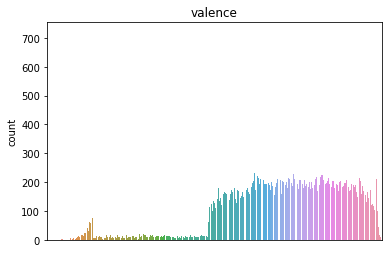

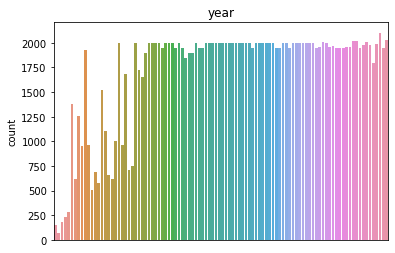

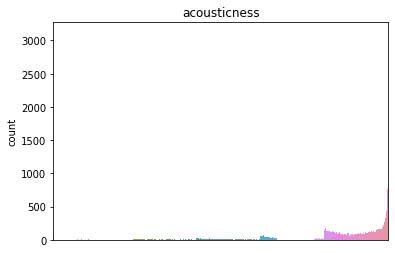

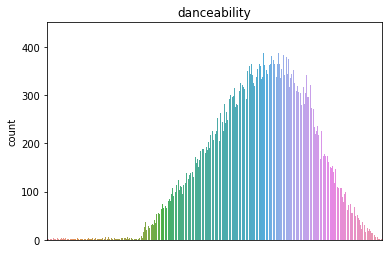

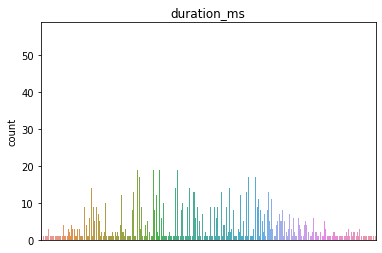

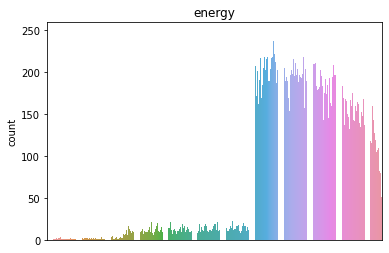

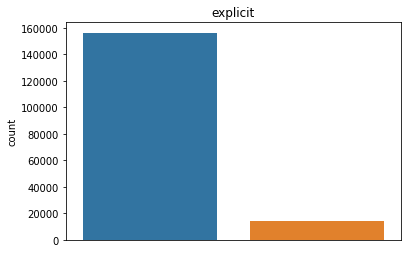

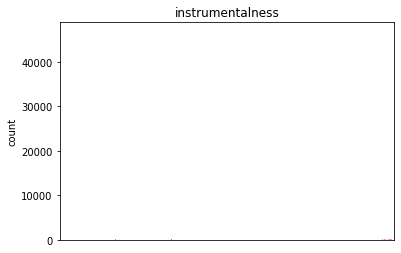

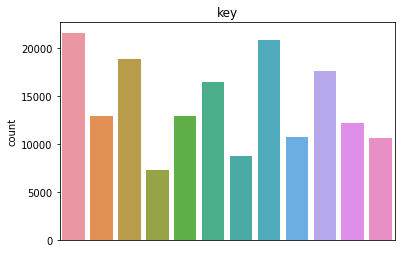

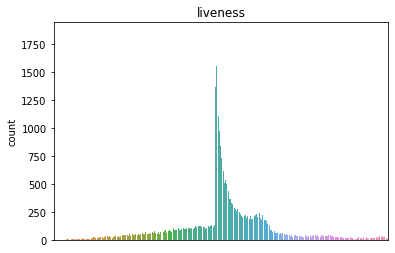

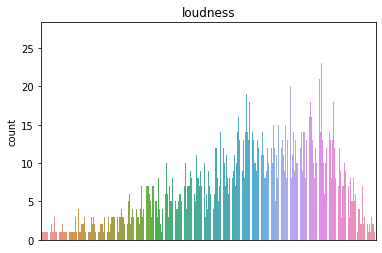

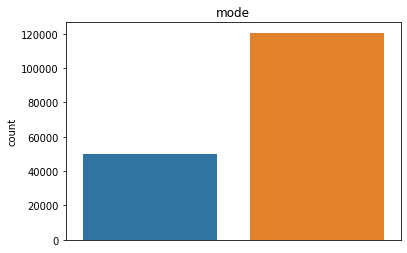

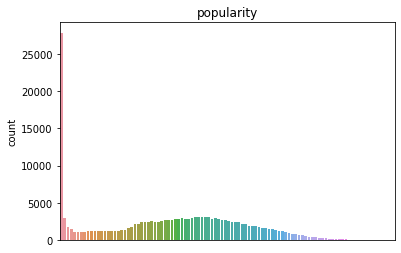

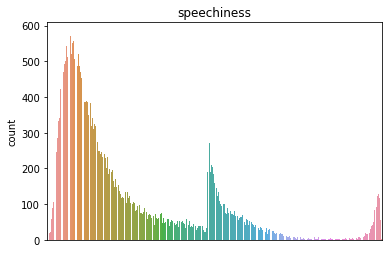

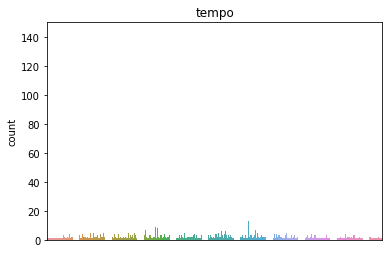

In [ ]:
# i=0
# fig, axs = plt.subplots(3,5)
# fig.set_figheight(10)
# fig.set_figwidth(17)
# fig.tight_layout()

for col in numericals:
    # axs[int(i/5),i%5].set_xticklabels([])
  
    ax = plt.gca()

    ax.axes.xaxis.set_visible(False)
    sns.countplot(data=spotify,x=col,orient='v').set_title(col)#, ax=axs[int(i/5),i%5])
    pic = diretorio +'imgs/hist '+col+formato
    plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
    # print(i)
    # i+=1
    plt.show()

Aqui, sabe-se lá porque, o `plt.subplots()` funcionou.

aqui é possivel ver como os dados estão distribuidos, e ver sua variação e escala, um destaque para duração, pois sua escala está em milisegundos, onde seus valores mais altos podem ultrapassar a marca de 4000000 milisegundos, a normalização se faz necessaria pois os algoritmos de cluster levam muito em consideração os valores absolutos.

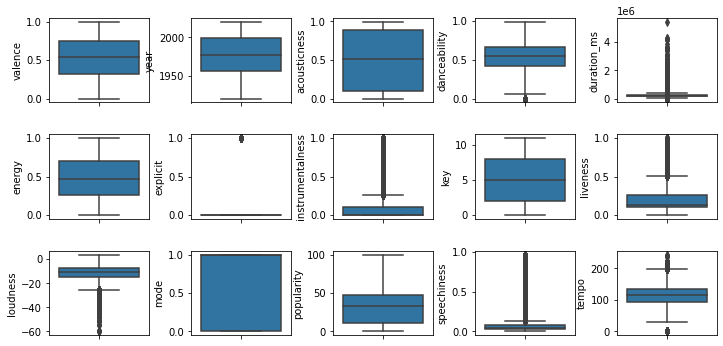

In [ ]:
i=0
fig, axs = plt.subplots(3,5)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.tight_layout()

for col in numericals:
    
    # plt.xticks(rotation= 60)
    sns.boxplot(data=spotify,y=col,orient='v', ax=axs[int(i/5),i%5])
    # plt.legend(loc='upper right')
    
    i+=1
pic = diretorio+'imgs/boxplots.pdf'
plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
plt.show()


#teste


`spca`
spotify pca

`sct`
spotify column transform







`make_column_transformer()`

é uma boa maneira de processar um datraframe principalmente quando seus atributos requerem tratamentos diferentes, neste caso, todos são tratados da mesma forma, porém, é escalável, se houver novos atributos, é fácil tratar eles também.

`normalizado` dados após serem escalados.

`reduzido` dados após aplicar a redução de dimensionalidade.

In [ ]:
spca = PCA()

sct = make_column_transformer(
    (StandardScaler(), numericals),
    remainder='passthrough'
)

normalizado = sct.fit_transform(spotify)
reduzido = spca.fit_transform(normalizado)

##Verificação se vale a pena utilizar o PCA
não se mostrou muito útil por haver muita perda de representação dos dados quando sua dimensão é reduzida.

provavelmente seria mais útil se houvessem mais atributos.

In [ ]:
cum_exp_var = []
var_exp = 0
for i in spca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

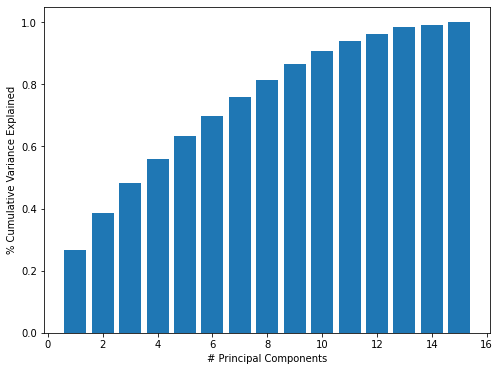

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,len(spca.explained_variance_ratio_)+1), cum_exp_var)
pic = diretorio+'imgs/PCA.pdf'
plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

#Modelos

## K-médias

Escolhendo um bom número para K com a técnica do cotovelo.

In [ ]:
maxk = 20
distortions = []
for i in range(1, maxk):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normalizado)
    distortions.append(km.inertia_)

Como é possível observar na figura, não há um ponto que seja considerado um ponto anguloso, então K foi escolhido como 2 por ser mais fácil de visualizar, tendo em vista que foram testados valores acima de 4, e houve uma poluição visual.

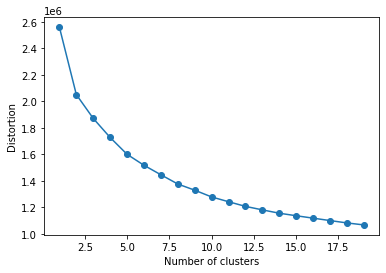

In [ ]:
plt.plot(range(1, maxk), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
pic = diretorio+'imgs/cotovelo.pdf'
plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
km = KMeans(
        n_clusters=2, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(normalizado)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

pequena gambiarra para pintar os pontos de acordo com seu cluster, a função `spotfy.plot()` requer um dataframe

In [ ]:
label = pd.DataFrame(km.labels_,columns=['label']) 

In [ ]:
colors = {
    0:'blue',
    1:'red',
    2:'green',
    3:'yellow',
    4:'purple',
    5:'orange',
    6:'grey',
    7:'brown',
    8:'cyan',
    9:'peru'
    }

###muitos graficos

Para visualizar os cluster, são escolhidos alguns pares de atributos de maneira arbitraria, e a validação se da de maneira empirica, tendo em vista que as métricas que tentamos utilizar crasharam a maquina do colab por usarem muita RAM.

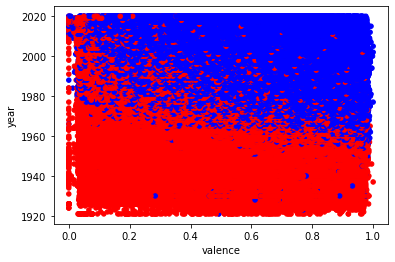

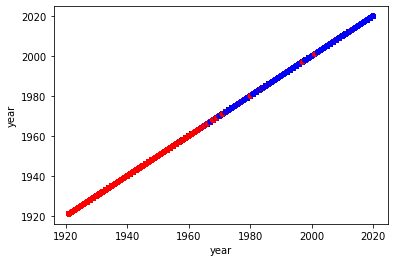

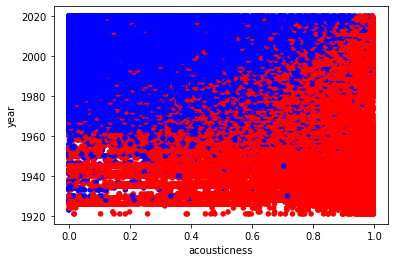

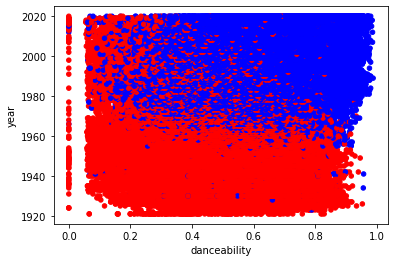

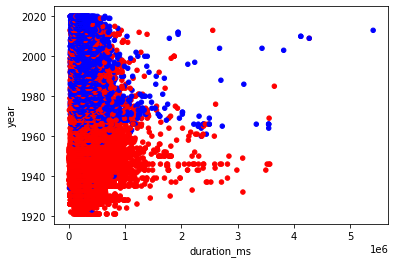

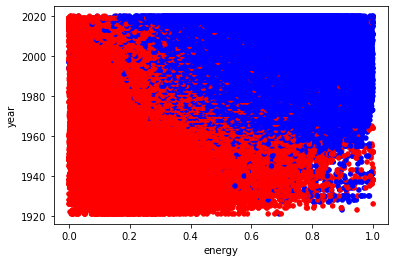

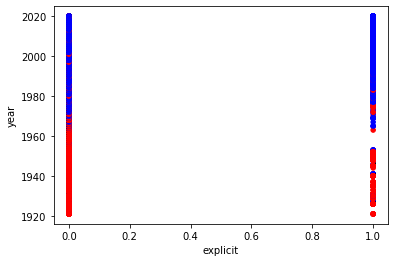

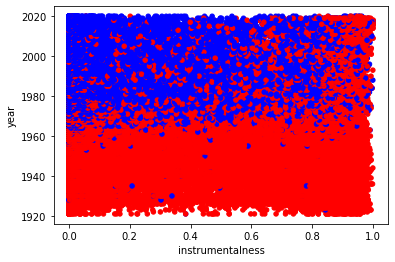

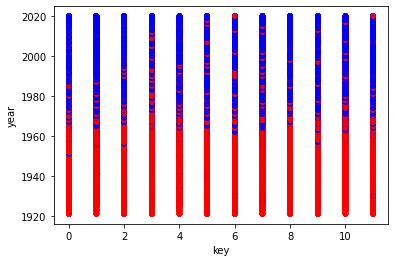

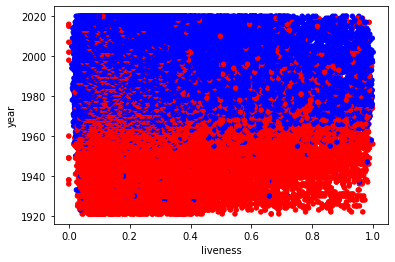

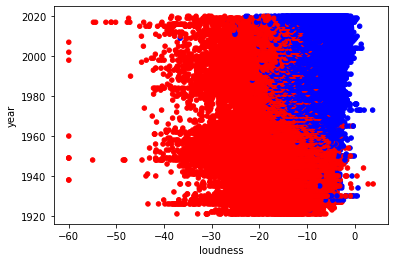

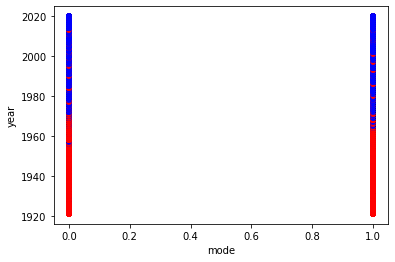

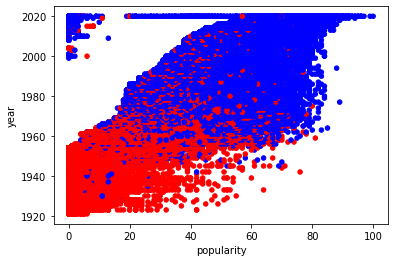

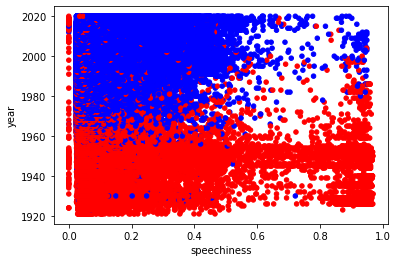

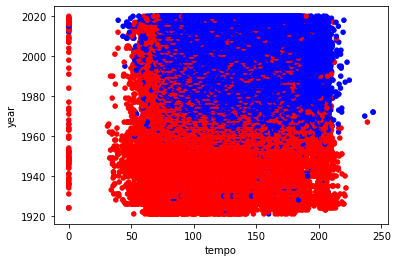

In [ ]:
for col in numericals:
    spotify.plot(x = col, y='year', kind = 'scatter',c=label['label'].map(colors))
    pic = diretorio+'imgs/km/yearX'+col+'.pdf'
    plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
    plt.show()

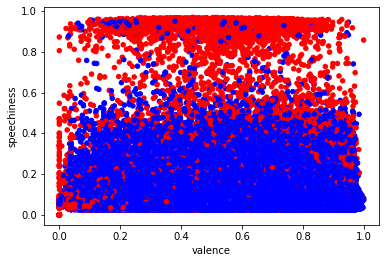

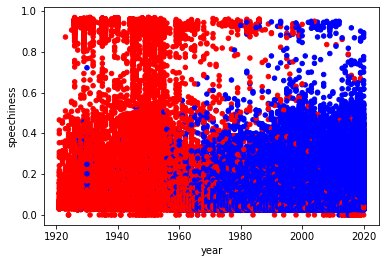

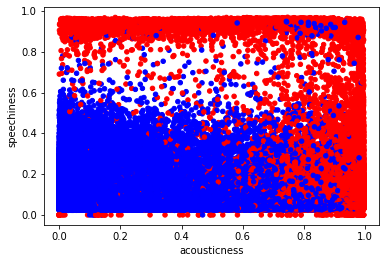

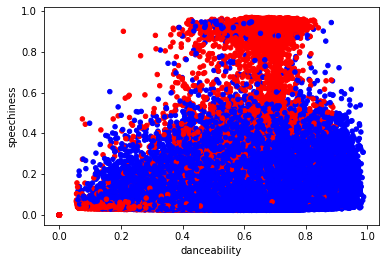

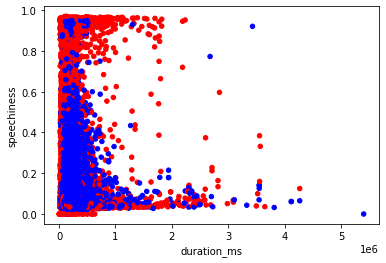

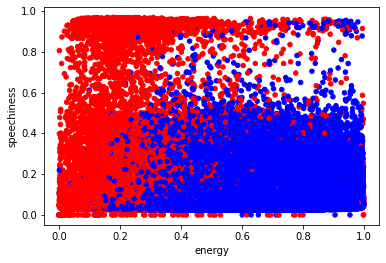

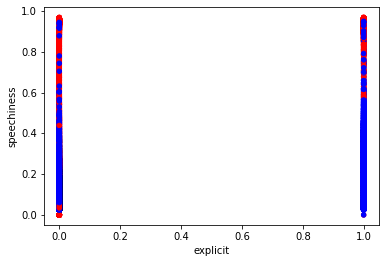

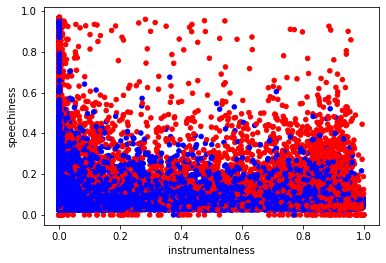

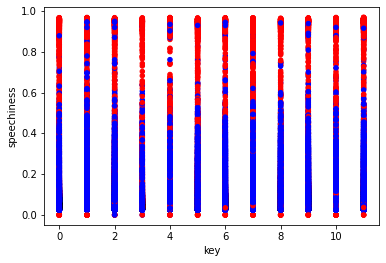

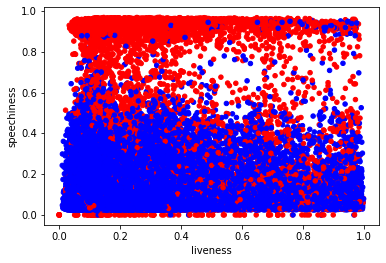

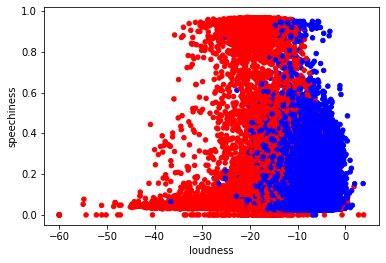

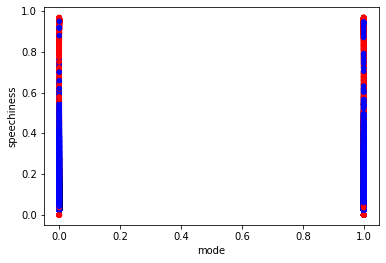

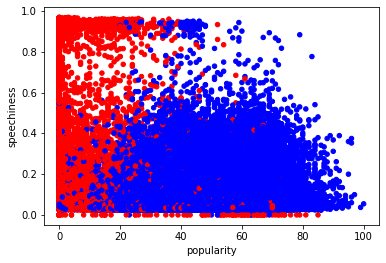

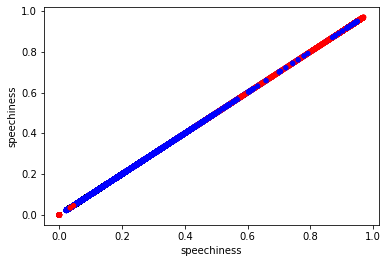

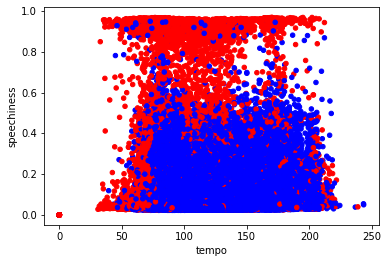

In [ ]:
for col in numericals:
    spotify.plot(x = col, y='speechiness', kind = 'scatter',c=label['label'].map(colors))
    pic = diretorio+'imgs/km/speechinessX'+col+'.pdf'
    plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
    plt.show()

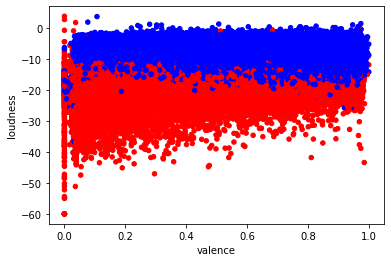

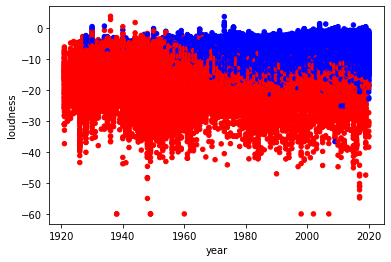

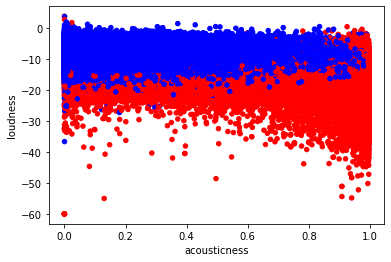

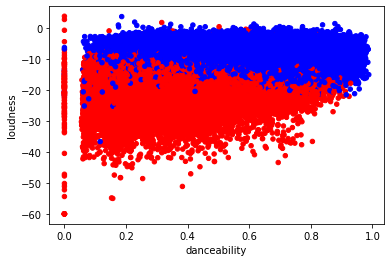

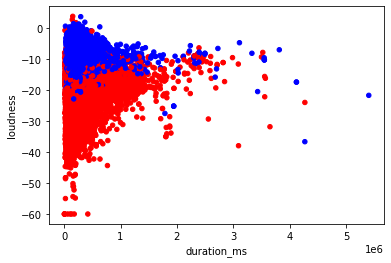

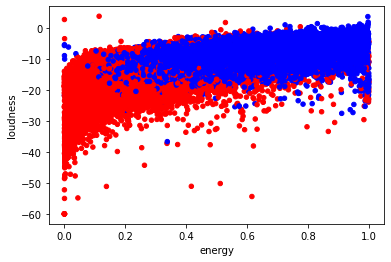

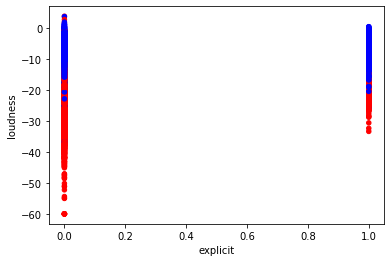

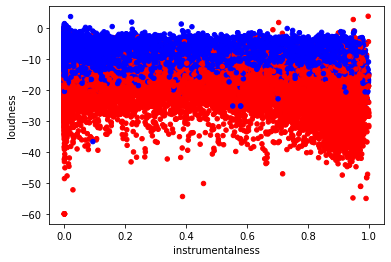

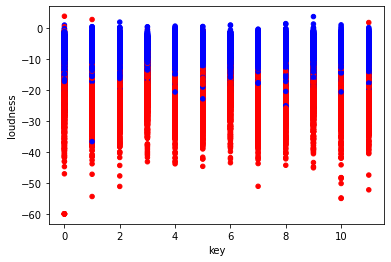

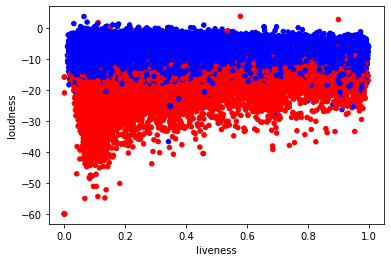

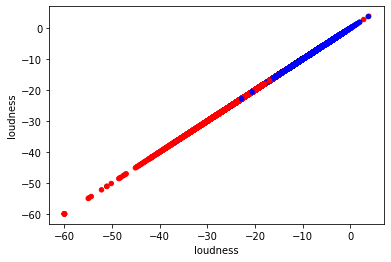

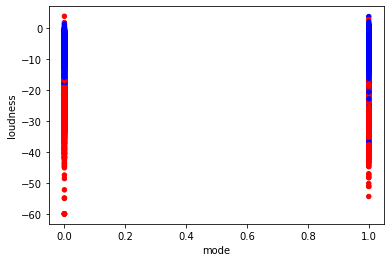

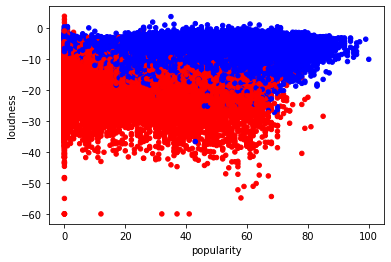

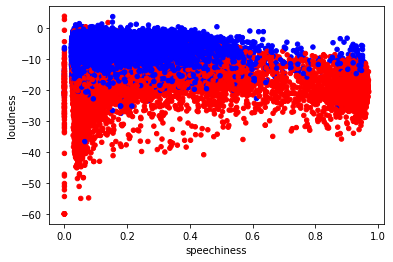

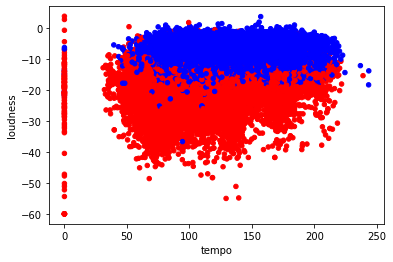

In [ ]:
for col in numericals:
    spotify.plot(x = col, y='loudness', kind = 'scatter',c=label['label'].map(colors))
    pic = diretorio+'imgs/km/loudnessX'+col+'.pdf'
    plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
    plt.show()

## aglomerative cluster

Este método excedeu a quatidade usada de RAM, então apenas uma partição da base de dados é utilizada.

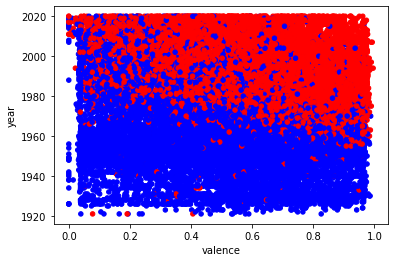

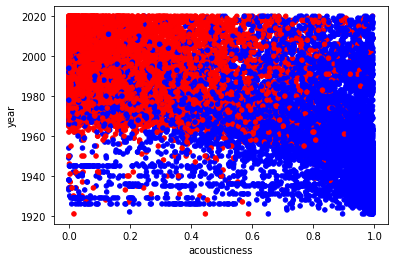

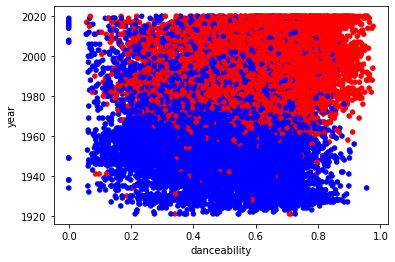

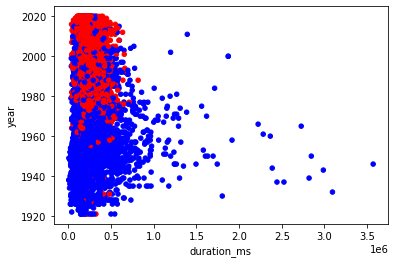

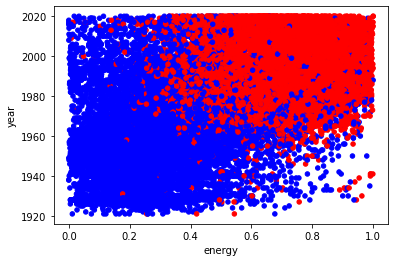

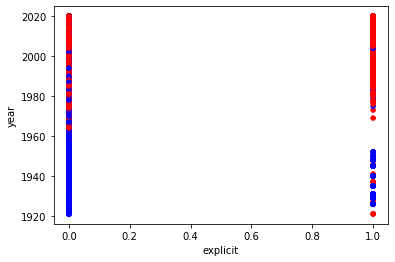

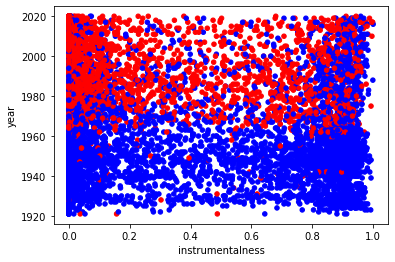

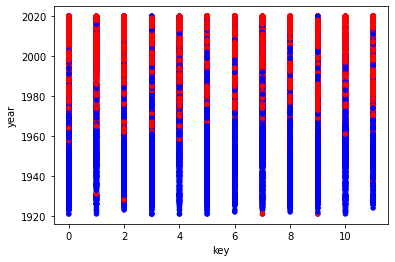

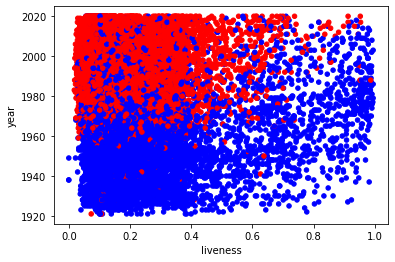

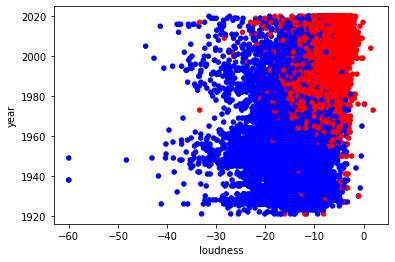

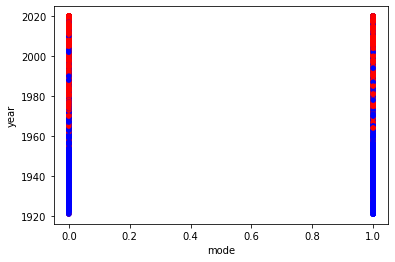

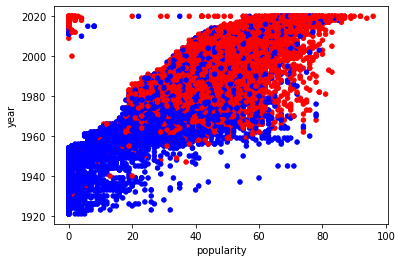

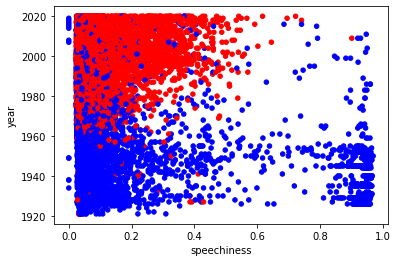

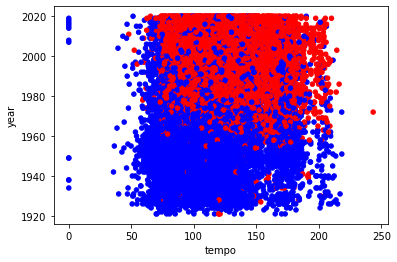

In [ ]:
scaler = StandardScaler()
sp = spotify.sample(n=20000)
scaled_features = scaler.fit_transform(sp)

ac = AgglomerativeClustering(n_clusters=2,).fit(scaled_features)

df = pd.DataFrame(ac.labels_, columns=["labels"])
col_y = 'year'
for col in spotify.columns:
  if col == col_y:
    continue
  sp.plot(x = col, y = col_y, kind = 'scatter',c=df.labels.map(colors))
  pic = diretorio+'imgs/agro/yearX'+col+'.pdf'
  plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
  plt.show()